<a href="https://colab.research.google.com/github/mnngit/100DML/blob/main/Copy_of_D38_random_sample_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/100DML/datasets/train38.csv', usecols=['Age', 'Fare', 'Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [ ]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [ ]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [ ]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [ ]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [ ]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([42.  , 61.  , 24.  , 13.  , 38.  , 19.  , 56.  , 23.  , 50.  ,
       23.  , 28.  , 27.  ,  3.  , 47.  ,  6.  , 21.  , 38.  , 34.  ,
       34.  , 25.  , 43.  , 24.  , 20.  , 34.  , 41.  , 41.  , 42.  ,
       31.  , 28.  , 25.  , 24.  , 34.  , 40.  , 29.  , 16.  , 18.  ,
       32.  , 28.  , 30.  , 35.  , 42.  , 19.  , 15.  , 70.5 , 26.  ,
       36.  , 35.  , 33.  , 54.  , 50.  , 16.  , 41.  , 17.  , 31.  ,
       24.  , 42.  , 33.  , 28.  ,  4.  , 26.  , 28.  , 22.  , 39.  ,
        0.67, 60.  , 33.  , 29.  , 24.  , 16.  , 34.  , 45.5 , 62.  ,
       38.  , 34.  , 29.  , 24.  , 35.  ,  7.  , 18.  , 58.  , 22.  ,
       56.  , 30.  , 24.  , 14.  , 47.  , 13.  ,  2.  ,  0.83, 40.  ,
       35.  , 24.  , 29.  , 22.  , 23.  , 25.  , 16.  , 16.  , 21.  ,
       51.  , 33.  , 41.  , 34.5 , 21.  , 45.  , 34.  , 30.  , 14.  ,
       44.  , 21.  , 19.  ,  2.  , 30.  , 32.  , 38.  , 30.  , 42.  ,
       19.  , 26.  ,  4.  , 21.  , 42.  , 43.  , 47.  , 25.  , 58.  ,
       60.  , 36.  ,

In [ ]:
len(X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values)

148

In [ ]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values


In [ ]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,29.0
493,71.0,49.5042,71.0
527,NaN,221.7792,28.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


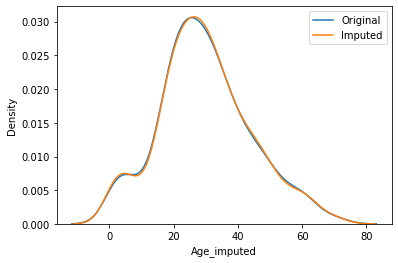

In [ ]:
sns.distplot(X_train['Age'], label='Original', hist=False)
sns.distplot(X_train['Age_imputed'], label='Imputed', hist=False)

plt.legend()
plt.show()

In [ ]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  205.4043565762338


In [ ]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,58.453414
Age,71.512440,204.349513,204.349513
Age_imputed,58.453414,204.349513,205.404357


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


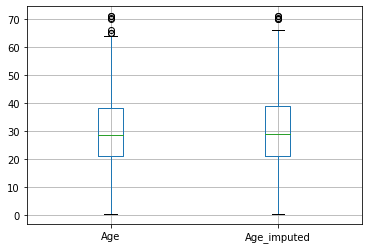

In [ ]:
X_train[['Age', 'Age_imputed']].boxplot()

In [ ]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/100DML/datasets/house-train38.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [ ]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [ ]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [ ]:
X = data
y = data['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [ ]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu'] = X_test['FireplaceQu']

In [ ]:
X_train.sample(4)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1172,NaN,TA,171900,TA,NaN
1298,Gd,TA,160000,TA,Gd
1247,NaN,TA,169900,TA,NaN
302,TA,TA,205000,TA,TA


In [ ]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu'][X_test['FireplaceQu'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3

In [ ]:
X_train['GarageQual'].value_counts()

TA    1049
Fa      41
Gd      11
Po       1
Ex       1
Name: GarageQual, dtype: int64

In [ ]:
len(X_train['GarageQual'].dropna())

1103

In [ ]:
len(X_train['GarageQual'])

1168

In [ ]:
len(X_train)

1168

In [ ]:
X_train['GarageQual_imputed'].value_counts()

TA    1114
Fa      41
Gd      11
Po       1
Ex       1
Name: GarageQual_imputed, dtype: int64

In [ ]:
temp = pd.concat([
    X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts() / len(X_train)

    ], axis=1)
temp.columns = ['Original', 'imputed']


In [ ]:
temp

,Original,imputed
TA,0.951043,0.953767
Fa,0.037171,0.035103
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [ ]:
temp = pd.concat([
    X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts() / len(df)

], axis=1)

temp.columns = ['Original', 'imputed']

temp

,Original,imputed
Gd,0.494272,0.649832
TA,0.412439,0.539843
Fa,0.040917,0.052750
Po,0.027823,0.035915
Ex,0.024550,0.032548


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

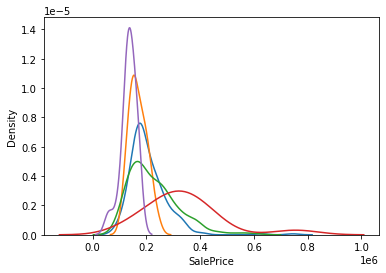

In [ ]:
for category in X_train['FireplaceQu'].dropna().unique():
  sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'], hist=False, label=category)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

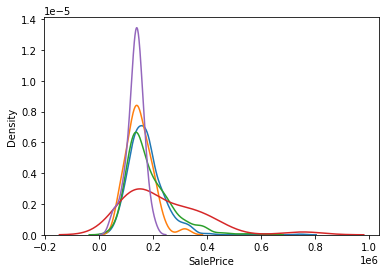

In [ ]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
  sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'], hist=False, label=category)

plt.show()